In [78]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

In [34]:
df = pd.read_csv('Salary_dataset.csv')

In [35]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [36]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

### Explore Data

In [37]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [39]:
df.shape

(30, 2)

In [40]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


### Clean Data

In [41]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [42]:
df.duplicated().sum()

0

### Linear Relation between YearsExperience and Salary

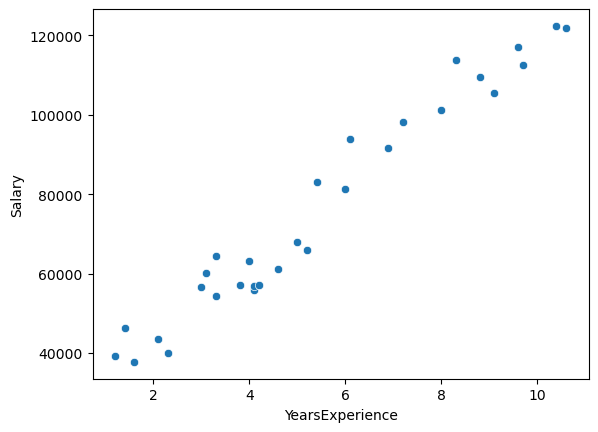

In [44]:
sns.scatterplot(x = df.YearsExperience, y = df.Salary)
plt.show()

### Split data into training and testing 

In [53]:
x_train, x_test, y_train, ytest = train_test_split(df.YearsExperience, df.Salary, train_size = .7, random_state = 42 )

In [57]:
# Create new axis for x column
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]

C:\Users\sohil\AppData\Local\Temp\ipykernel_23172\3530096604.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train = x_train[:,np.newaxis]
C:\Users\sohil\AppData\Local\Temp\ipykernel_23172\3530096604.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test = x_test[:,np.newaxis]


In [62]:
reg = linear_model.LinearRegression()

In [65]:
reg.fit(x_train, y_train)

LinearRegression()

In [70]:
y_predict = reg.predict(x_test)
y_predict

array([115574.62288352,  71680.93878159, 102499.90847018,  75416.57147111,
        55804.4998511 ,  60474.04071301, 122111.98009019, 107169.44933209,
        63275.76523015])

### Line Equation

In [82]:
m = reg.coef_

In [83]:
b = reg.intercept_

In [84]:
# y = m x + b 
print('y = {0} x + {1}'.format(m,b))

y = [9339.08172382] x + 24985.53016251169


In [79]:
#mean square error
mean_squared_error(y_test, y_predict)

37784662.46621308

In [80]:
#mean_absolute_error 
mean_absolute_error(y_test, y_predict)

5161.328710400178

#### Accuracy

In [81]:
# R2 score
r2_score(y_test, y_predict)

0.9414466227178215